In [56]:
import os
import zipfile

def unzip_file(zip_file, extract_to='.'):
    """Unzip a file to the specified directory."""
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Files in {extract_to}:", os.listdir(extract_to))

def load_data(file_path):
    """Load the CSV data into a DataFrame, with preliminary cleaning."""
    df = pd.read_csv(file_path, engine='python')
    df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace from the column names
    df.drop(columns=['Fwd Header Length.1'], inplace=True)
    df.dropna(subset=['Flow ID'], inplace=True)  # Drop rows where 'Flow ID' is null
    df.replace('Infinity', -1, inplace=True)
    df[['Flow Bytes/s', 'Flow Packets/s']] = df[['Flow Bytes/s', 'Flow Packets/s']].apply(pd.to_numeric, errors='coerce')
    df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)
    return df

def encode_features(df):
    """Encode string features to numeric using Label Encoder."""
    string_features = df.select_dtypes(include=['object']).columns.tolist()
    string_features.remove('Label')  # Exclude the target variable 'Label'
    le = LabelEncoder()
    df[string_features] = df[string_features].apply(lambda col: le.fit_transform(col))
    return df

# Specify the zip file location and directory to extract to
zip_file = '/content/archive (2).zip'
unzip_file(zip_file, './extracted_data')  # Change extract_to to where you want the files

# Define the path based on the detailed structure provided
csv_file_path = './extracted_data/MachineLearningCSV/MachinelearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'

# Check if CSV exists and process data
if os.path.exists(csv_file_path):
    print("CSV file found:", csv_file_path)
    data = load_data(csv_file_path)
    data = encode_features(data)
    print(data.shape)
    print(data['Label'].unique())
    print(data['Label'].value_counts())
else:
    print("CSV file not found at:", csv_file_path)


Files in ./extracted_data: ['MachineLearningCSV.md5', 'MachineLearningCSV']
CSV file not found at: ./extracted_data/MachineLearningCSV/MachinelearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

def load_data(file_path):
    """Load the CSV data into a DataFrame, with preliminary cleaning."""
    df = pd.read_csv(file_path, engine='python')
    df.columns = df.columns.str.strip()  # Remove any leading/trailing whitespace from the column names
    print("Column names in the DataFrame:", df.columns.tolist())  # Print column names to verify
    return df

def preprocess_data(df):
    """Preprocess data by cleaning and encoding."""
    if 'Fwd Header Length.1' in df.columns:
        df.drop(columns=['Fwd Header Length.1'], inplace=True)  # Drop if the column exists
    if 'Flow ID' in df.columns:
        df.dropna(subset=['Flow ID'], inplace=True)  # Drop rows where 'Flow ID' is null
    df.replace('Infinity', -1, inplace=True)  # Replace 'Infinity' string with -1
    df[['Flow Bytes/s', 'Flow Packets/s']] = df[['Flow Bytes/s', 'Flow Packets/s']].apply(pd.to_numeric, errors='coerce')
    df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)  # Replace any inf or NaN values with -1
    return df

def encode_features(df):
    """Encode string features to numeric using Label Encoder."""
    string_features = df.select_dtypes(include=['object']).columns.tolist()
    if 'Label' in string_features:
        string_features.remove('Label')  # Exclude the target variable 'Label'
    le = LabelEncoder()
    df[string_features] = df[string_features].apply(lambda col: le.fit_transform(col))
    return df

csv_file_path = './extracted_data/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
data = load_data(csv_file_path)
data = preprocess_data(data)
data = encode_features(data)

# Quick data overview
print(data.shape)
print(data['Label'].unique())
print(data['Label'].value_counts())

Column names in the DataFrame: ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'C

In [34]:
!pip install facets-overview

In [18]:
# Output some data properties
print(df.shape)
print(df['Label'].unique())
print(df['Label'].value_counts())


(170366, 84)
['BENIGN' 'Web Attack \x96 Brute Force' 'Web Attack \x96 XSS'
 'Web Attack \x96 Sql Injection']
Label
BENIGN                        168186
Web Attack  Brute Force        1507
Web Attack  XSS                 652
Web Attack  Sql Injection        21
Name: count, dtype: int64


In [20]:

# Calculate total counts for benign and attacks
benign_count = (df['Label'] == "BENIGN").sum()
attack_count = (df['Label'] != "BENIGN").sum()

# Save the original dataset to a CSV file
df.to_csv("web_attacks_unbalanced.csv", index=False)

# Calculate inclusion probabilities and target counts
enlargement_factor = 1.1
target_benign_inclusion = (attack_count / 30 * 70) * enlargement_factor
benign_inclusion_probability = target_benign_inclusion / benign_count

# Display calculated values
print(target_benign_inclusion, benign_inclusion_probability)

# Select non-BENIGN records
non_benign_df = df[df['Label'] != "BENIGN"]

# Randomly select a subset of BENIGN records based on calculated probability
benign_df = df[df['Label'] == "BENIGN"].sample(frac=benign_inclusion_probability, replace=False)

# Combine selected records into a balanced dataset
df_balanced = pd.concat([non_benign_df, benign_df]).sample(frac=1)  # Shuffle the dataset

# Save the balanced dataset to a CSV file
df_balanced.to_csv("web_attacks_balanced.csv", index=False)

# Print the value counts for verification
print(df_balanced['Label'].value_counts())


5595.333333333334 0.03326872232726466
Label
BENIGN                        5595
Web Attack  Brute Force      1507
Web Attack  XSS               652
Web Attack  Sql Injection      21
Name: count, dtype: int64


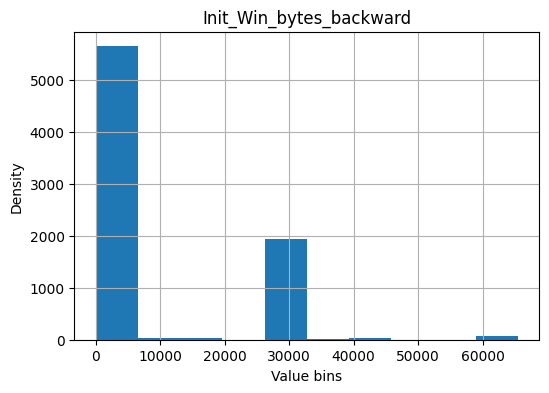

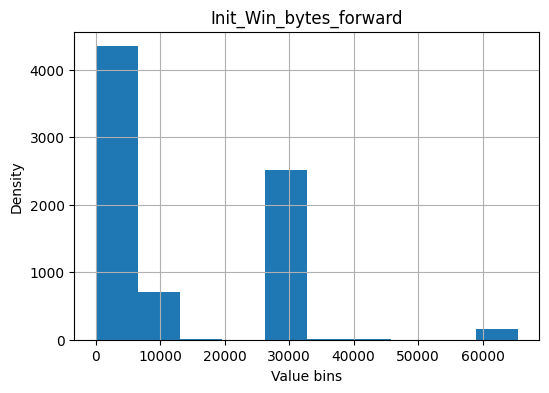

(7775, 74) (7775,)


In [23]:

# Load the balanced dataset
df = pd.read_csv('web_attacks_balanced.csv')

# Convert labels from categorical to numerical
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Define columns to be excluded from the dataset
excluded_columns = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp']
df.drop(columns=excluded_columns, errors='ignore', inplace=True)

# Define a function to create histograms
def plot_histogram(data, column_name, bins=10, file_name=None):
    plt.figure(figsize=(6,4))
    data[column_name].hist(bins=bins)
    plt.title(column_name)
    plt.xlabel("Value bins")
    plt.ylabel("Density")
    if file_name:
        plt.savefig(file_name, dpi=300)
    plt.show()  # Display the plot

# Plot histograms for specific features if they exist in the DataFrame
if 'Init_Win_bytes_backward' in df.columns:
    plot_histogram(df, 'Init_Win_bytes_backward', 10, 'Init_Win_bytes_backward.png')

if 'Init_Win_bytes_forward' in df.columns:
    plot_histogram(df, 'Init_Win_bytes_forward', 10, 'Init_Win_bytes_forward.png')

# Remove specific features from the dataset after plotting
more_exclusions = ['Init_Win_bytes_backward', 'Init_Win_bytes_forward']
df.drop(columns=more_exclusions, errors='ignore', inplace=True)

# Prepare features and target variable for modeling
X = df.drop(columns=['Label'])
y = df['Label'].values

# Output the shapes of features and target variable arrays
print(X.shape, y.shape)


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import confusion_matrix
from graphviz import Source

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Count occurrences of each class in the training set
class_counts_train = np.unique(y_train, return_counts=True)
print("Training set class distribution:", dict(zip(class_counts_train[0], class_counts_train[1])))

# Define and fit the decision tree model
decision_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
decision_tree.fit(X_train, y_train)

# Perform cross-validation and print the results
cv_scores = cross_val_score(decision_tree, X_train, y_train, cv=10)
print("Cross-validation scores:", cv_scores)

# Export and print the tree structure in text format
tree_rules = export_text(decision_tree, feature_names=X_train.columns.tolist())
print(tree_rules)

# Visualize the tree using Graphviz
tree_graph = export_graphviz(decision_tree, out_file=None, feature_names=X.columns, filled=True)
Source(tree_graph).render("decision_tree")

# Count occurrences of each class in the testing set
class_counts_test = np.unique(y_test, return_counts=True)
print("Testing set class distribution:", dict(zip(class_counts_test[0], class_counts_test[1])))

# Predict the testing set results and calculate the confusion matrix
y_pred = decision_tree.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Training set class distribution: {0: 3913, 1: 1529}
Cross-validation scores: [0.95045872 0.9559633  0.95588235 0.97058824 0.95404412 0.96507353
 0.95404412 0.95955882 0.95772059 0.95220588]
|--- Packet Length Mean <= 0.43
|   |--- Fwd IAT Std <= 3521317.88
|   |   |--- Bwd Packets/s <= 8831.10
|   |   |   |--- class: 0
|   |   |--- Bwd Packets/s >  8831.10
|   |   |   |--- class: 1
|   |--- Fwd IAT Std >  3521317.88
|   |   |--- class: 1
|--- Packet Length Mean >  0.43
|   |--- Subflow Fwd Bytes <= 34804.00
|   |   |--- class: 0
|   |--- Subflow Fwd Bytes >  34804.00
|   |   |--- class: 1

Testing set class distribution: {0: 1682, 1: 651}
Confusion Matrix:
 [[1621   61]
 [  49  602]]


In [27]:
import numpy as np
from sklearn.feature_selection import SelectFromModel

# Initialize and fit the SelectFromModel transformer
sfm = SelectFromModel(estimator=decision_tree)
sfm.fit(X_train, y_train)

# Display feature importances from the decision tree
print("Feature Importances:", sfm.estimator_.feature_importances_)

# Display the threshold being used to select the features
print("Feature Selection Threshold:", sfm.threshold_)

# Transform the training data to a reduced set of features
X_train_new = sfm.transform(X_train)

# Compare the original and selected number of features
print("Original number of features: {}, Selected number of features: {}"
      .format(X_train.shape[1], X_train_new.shape[1]))

# Get the indices of the features sorted by importance
indices = np.argsort(decision_tree.feature_importances_)[::-1]

# Print the top 10 most important features along with their importance scores
print("Top 10 Features:")
for idx, i in enumerate(indices[:10]):
    print("{:d}.\t{:s} - {:.4f}".format(idx + 1, X_train.columns[i], decision_tree.feature_importances_[i]))


Feature Importances: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.18977892 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.0231601  0.         0.         0.72312383 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.06393715 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
Feature Selection Threshold: 0.013513513513513514
Original number of features: 74, Selected number of features: 4
Top 10 Features:
1.	Packet Length Mean - 0.7231
2.	Fwd IAT Std - 0.1898
3.	Subflow Fwd Bytes - 0.0639
4.	Bwd Packets/s - 0.0232
5.	Bw

R^2 Training Score: 0.99 
R^2 Validation Score: 0.98 
Out-of-bag Score: 0.98
Top 20 Features:
1.	#13	0.086	Flow Bytes/s
2.	#51	0.082	Average Packet Size
3.	#39	0.064	Packet Length Mean
4.	#38	0.061	Max Packet Length
5.	#23	0.060	Fwd IAT Min
6.	#7	0.056	Fwd Packet Length Mean
7.	#61	0.047	Subflow Fwd Bytes
8.	#52	0.045	Avg Fwd Segment Size
9.	#3	0.042	Total Length of Fwd Packets
10.	#15	0.034	Flow IAT Mean
11.	#21	0.031	Fwd IAT Std
12.	#5	0.027	Fwd Packet Length Max
13.	#14	0.024	Flow Packets/s
14.	#0	0.023	Flow Duration
15.	#20	0.022	Fwd IAT Mean
16.	#33	0.022	Fwd Header Length
17.	#16	0.021	Flow IAT Std
18.	#22	0.020	Fwd IAT Max
19.	#35	0.018	Fwd Packets/s
20.	#17	0.015	Flow IAT Max


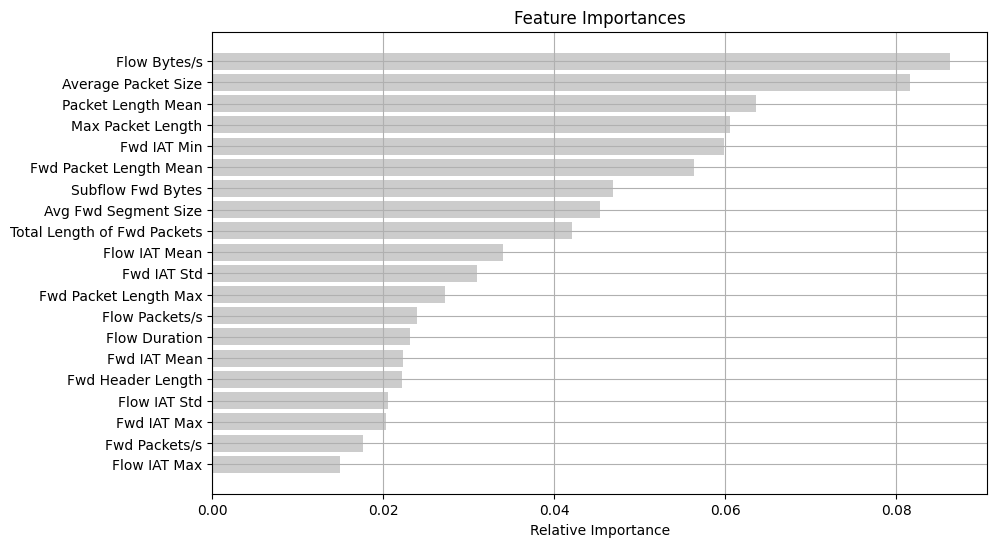

Confusion Matrix:
 [[1656   26]
 [  26  625]]
Selected top features: ['Flow Bytes/s', 'Average Packet Size', 'Packet Length Mean', 'Max Packet Length', 'Fwd IAT Min', 'Fwd Packet Length Mean', 'Subflow Fwd Bytes', 'Avg Fwd Segment Size', 'Total Length of Fwd Packets', 'Flow IAT Mean', 'Fwd IAT Std', 'Fwd Packet Length Max', 'Flow Packets/s', 'Flow Duration', 'Fwd IAT Mean', 'Fwd Header Length', 'Flow IAT Std', 'Fwd IAT Max', 'Fwd Packets/s', 'Flow IAT Max']


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix


# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Print the R^2 score for training and validation sets, along with the out-of-bag score
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

# Retrieve feature importances from the random forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print and collect the top 20 features
webattack_features = []
print("Top 20 Features:")
for index in range(20):
    feature_name = X.columns[indices[index]]
    webattack_features.append(feature_name)
    print(f'{index + 1}.\t#{indices[index]}\t{importances[indices[index]]:.3f}\t{feature_name}')

# Visualization of the 20 least important features
least_indices = np.argsort(importances)[-20:]
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(20), importances[least_indices], color='#cccccc', align='center')
plt.yticks(range(20), [X.columns[i] for i in least_indices])
plt.xlabel('Relative Importance')
plt.grid(True)
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

# Make predictions and display the confusion matrix
y_pred = rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Output the selected top feature names
print("Selected top features:", webattack_features[:20])


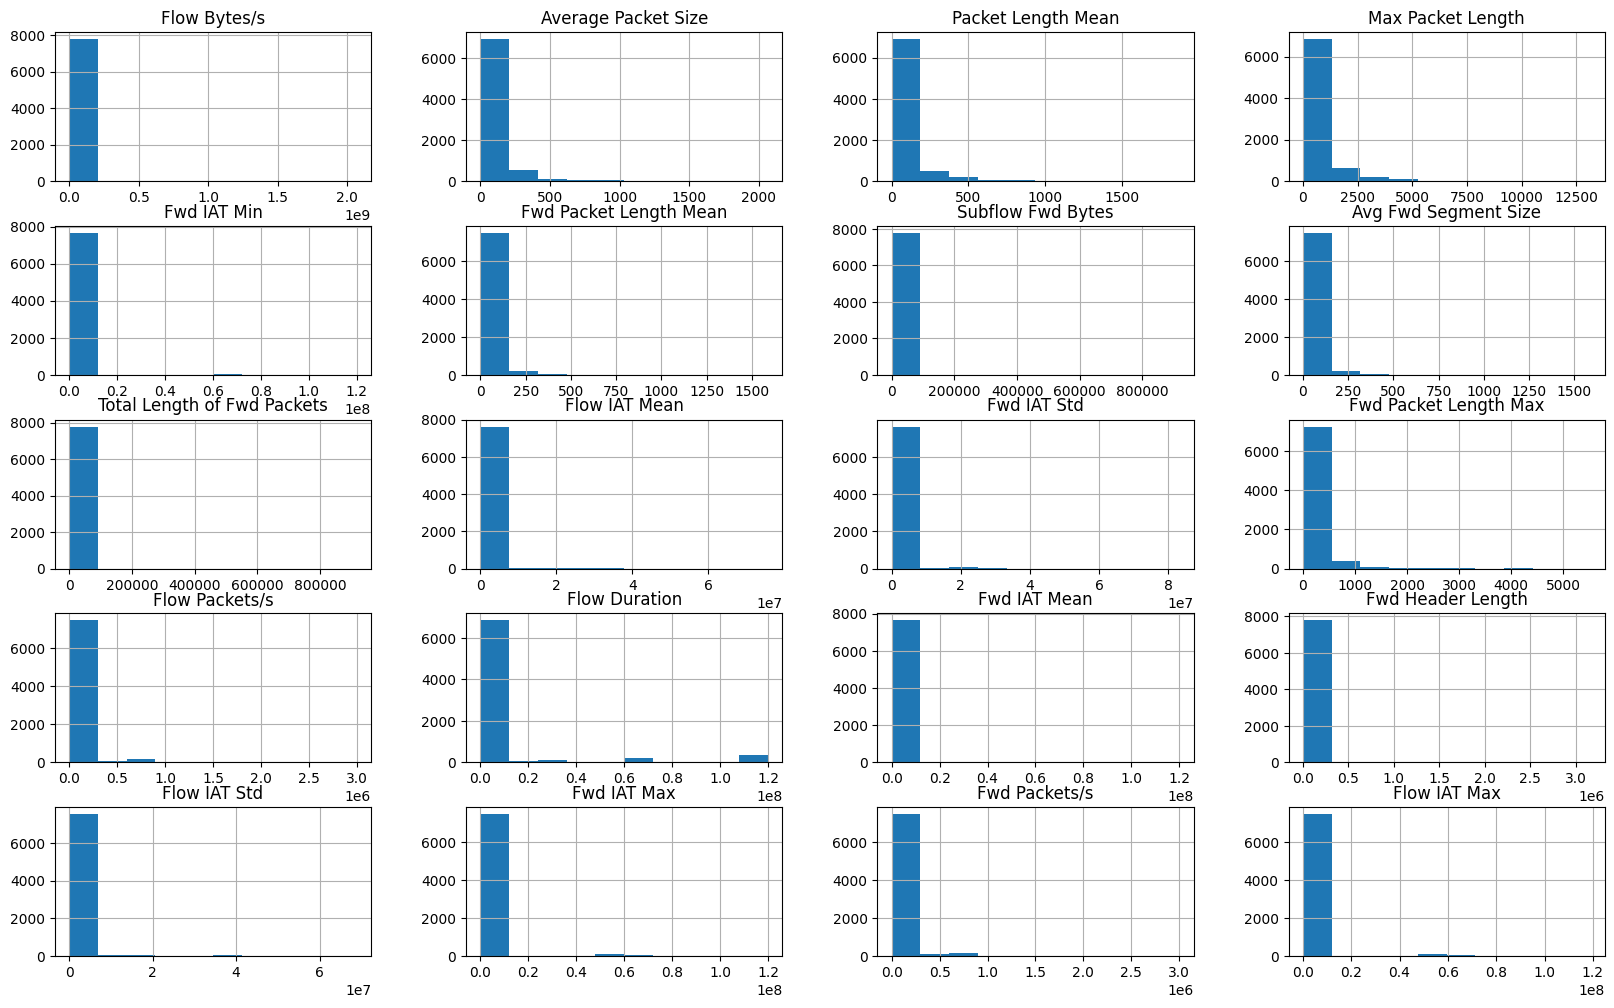

In [30]:
df[webattack_features].hist(figsize=(20,12), bins=10);
plt.savefig('features_hist.png', dpi=300)

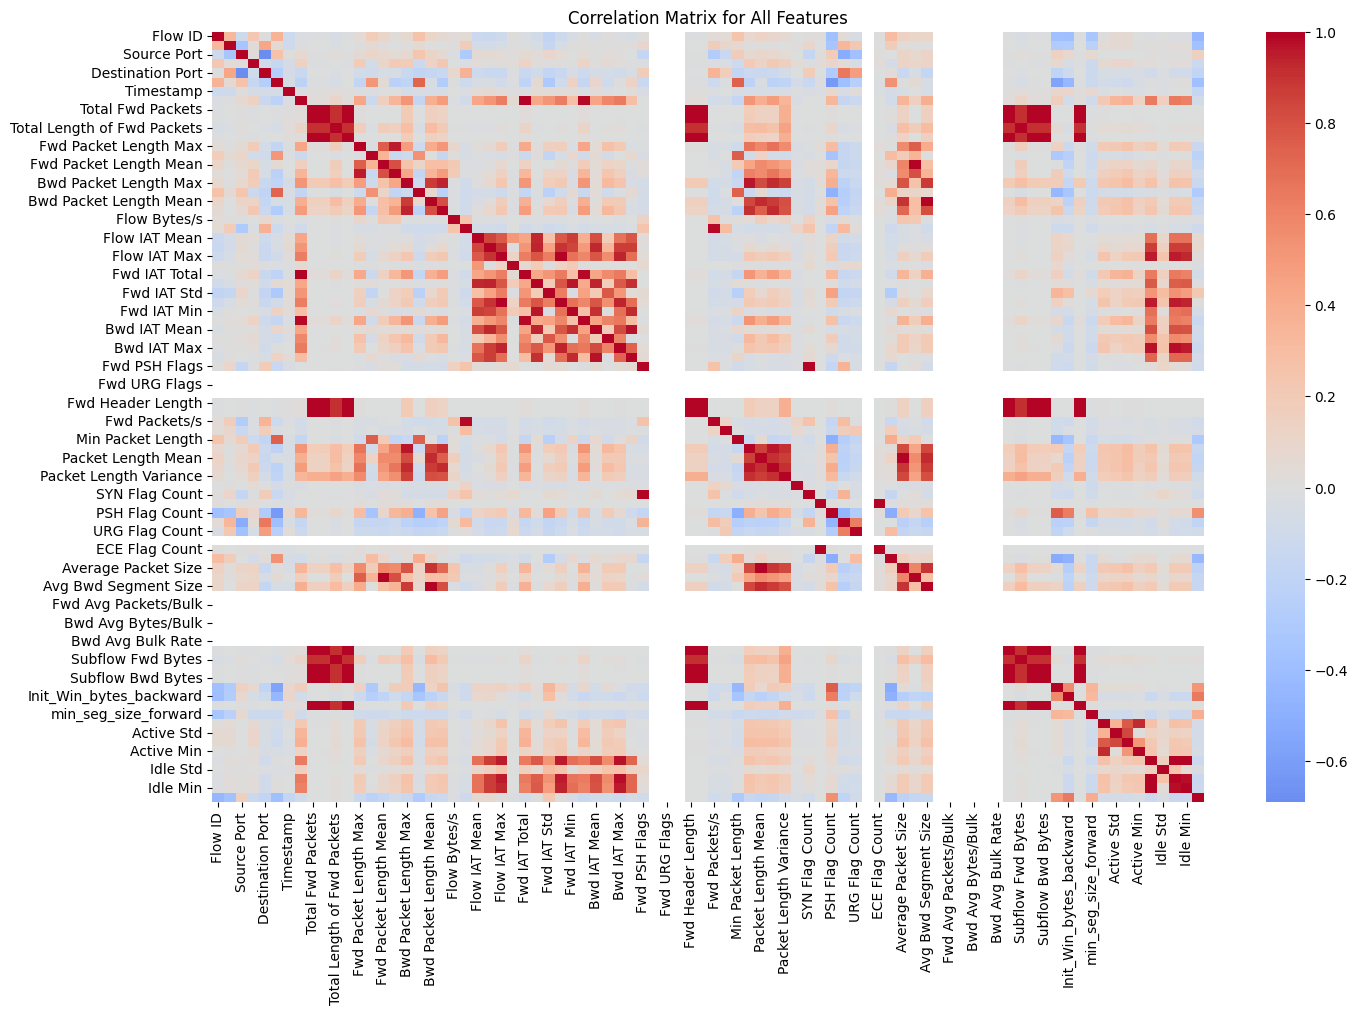

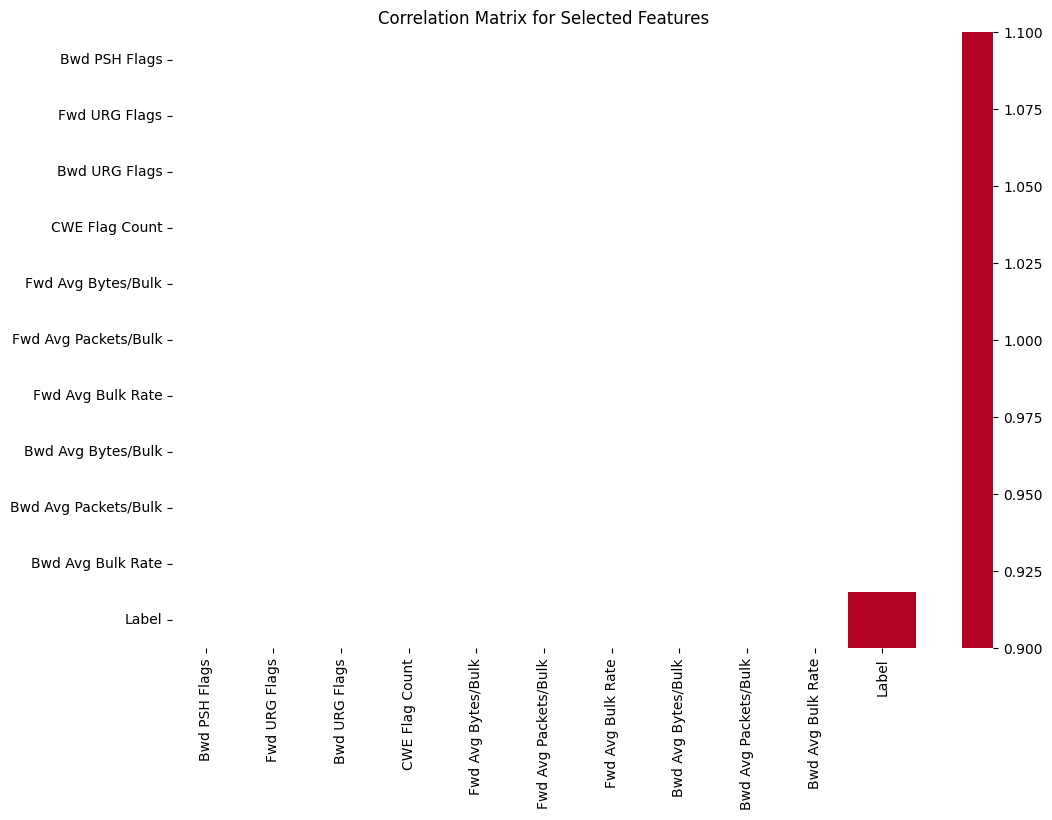

Removed Features due to High Correlation:
['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Coun

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('web_attacks_balanced.csv')

# Convert categorical variables to numeric using LabelEncoder
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Visualize data distributions using Facets Overview
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train + test', 'table': df}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")


# Generate a correlation heatmap for all features
plt.figure(figsize=(16, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for All Features')
plt.savefig('all_features_corr_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify and remove highly correlated features based on a threshold
threshold = 0.9
columns_to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold) and column != 'Label']
df.drop(columns=columns_to_drop, inplace=True)

# Generate a smaller correlation heatmap for the remaining features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Selected Features')
plt.savefig('reduced_features_corr_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Print removed features
print("Removed Features due to High Correlation:")
print(columns_to_drop)



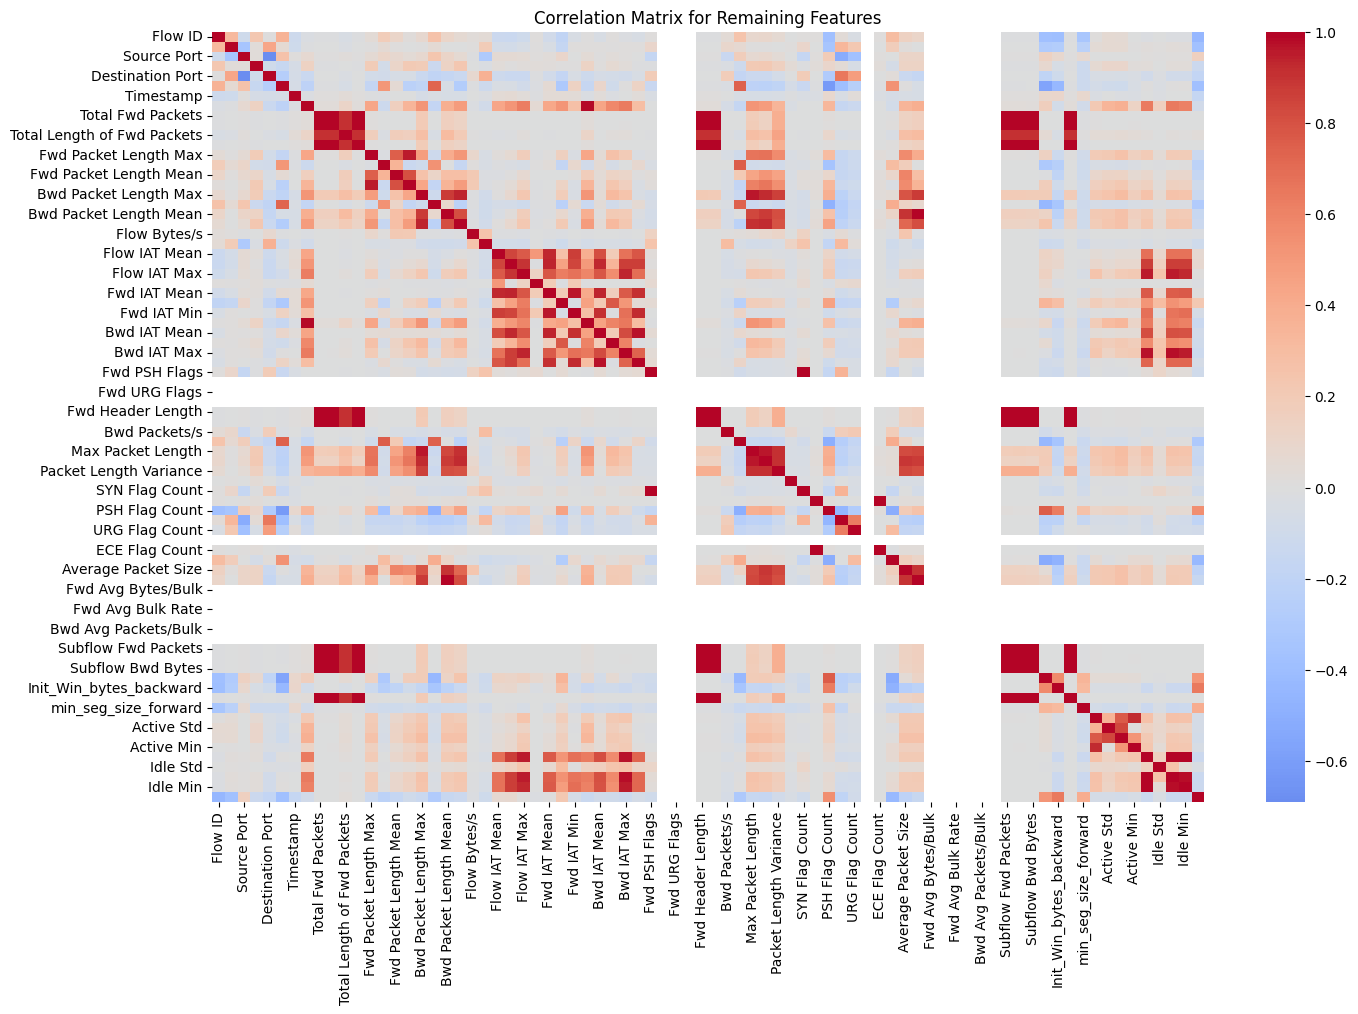

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('web_attacks_balanced.csv')

# Convert categorical variables to numeric using LabelEncoder if necessary
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Assuming object type implies categorical
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le  # Store label encoder for each column

# Features specified to be removed
to_be_removed = {'Packet Length Mean', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes',
                 'Fwd Packets/s', 'Fwd IAT Total', 'Fwd IAT Max'}
# Remove specified features from the DataFrame
df.drop(columns=list(to_be_removed), errors='ignore', inplace=True)

# Visualize data distributions using Facets Overview
gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train + test', 'table': df}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")


# Generate a correlation heatmap for the remaining features
plt.figure(figsize=(16, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Remaining Features')
plt.savefig('remaining_features_corr_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [39]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('web_attacks_balanced.csv')

# Prepare labels and features
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y = df['Label'].values

# Assume webattack_features contains the list of feature names to use
webattack_features = [column for column in df.columns if column not in ['Label']]  # Example feature list
X = df[webattack_features]

# Display shapes of features and labels
print(X.shape, y.shape)

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)

# Define hyperparameters grid
parameters = {
    'n_estimators': [10],
    'min_samples_leaf': [3],
    'max_features': [3],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 20, 30, 50]
}

# Define scoring metrics
scoring = {'f1': 'f1', 'accuracy': 'accuracy'}  # This should be a dictionary

# Setup GridSearchCV
gcv = GridSearchCV(rfc, parameters, scoring=scoring, refit='f1', cv=10, return_train_score=True)

# Execute the grid search
import time
start_time = time.time()
gcv.fit(X, y)
print("Grid Search took {:.2f} seconds".format(time.time() - start_time))

# Print best parameters and best score
print("Best parameters:", gcv.best_params_)
print("Best F1 score:", gcv.best_score_)

# Show grid search results
cv_results = pd.DataFrame(gcv.cv_results_)
cv_results = cv_results[['param_max_depth', 'mean_test_f1', 'mean_test_accuracy', 'rank_test_f1']]
print(cv_results.head())


(7775, 83) (7775,)
Grid Search took 20.84 seconds
Best parameters: {'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 10}
Best F1 score: 0.9977116296556655
  param_max_depth  mean_test_f1  mean_test_accuracy  rank_test_f1
0               1      0.851201            0.918714            17
1               2      0.901633            0.949066            16
2               3      0.925248            0.960515            15
3               4      0.950841            0.973632            14
4               5      0.985342            0.991896            13


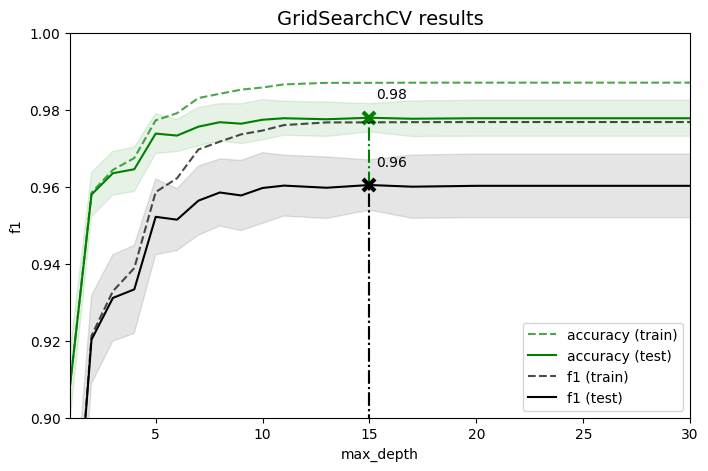

In [40]:

plt.figure(figsize=(8, 5))
plt.title("GridSearchCV results", fontsize=14)

plt.xlabel("max_depth")
plt.ylabel("f1")

ax = plt.gca()
ax.set_xlim(1, 30)
ax.set_ylim(0.9, 1)

X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index] + 0.3, best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.savefig('GridSearchCV_results.png', dpi=300)
plt.show()

In [43]:

from sklearn.model_selection import GridSearchCV

# Load your data and prepare X, y
df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y = df['Label'].values
X = df[webattack_features]  # Make sure 'webattack_features' is defined as your feature set

# Define the RandomForestClassifier and parameters for GridSearchCV
rfc = RandomForestClassifier(random_state=1)
parameters = {
    'n_estimators': [30, 50, 70],
    'min_samples_leaf': [3, 5, 7],
    'max_features': [3, 5, 7, 10],
    'max_depth': [10, 17, 23]
}

# Define scoring metrics
scoring = {'f1': 'f1', 'accuracy': 'accuracy'}

# Setup and run GridSearchCV
gcv = GridSearchCV(rfc, parameters, scoring=scoring, refit='f1', cv=3, return_train_score=True)

# Use magic command for timing
%time gcv.fit(X, y)

# Output the best parameters and scores
print("Best estimator:", gcv.best_estimator_)
print("Best parameters:", gcv.best_params_)
print("Best F1 score:", gcv.best_score_)


CPU times: user 1min 59s, sys: 303 ms, total: 2min
Wall time: 2min 2s
Best estimator: RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=3,
                       n_estimators=50, random_state=1)
Best parameters: {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 3, 'n_estimators': 50}
Best F1 score: 1.0


In [45]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

webattack_features = [column for column in df.columns if column not in ['Label']]
X = df[webattack_features]
y = df['Label'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

# Initialize and fit the RandomForestClassifier
rfc = RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3, n_estimators=50, random_state=42, oob_score=True)
rfc.fit(X_train, y_train)

# Feature importance extraction
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Print top 10 important features
print("Top 10 important features:")
for index in range(10):
    feature_index = indices[index]
    print(f"{index + 1}.\t#{feature_index}\t{importances[feature_index]:.3f}\t{features[feature_index]}")

# Predict on the test set
y_pred = rfc.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)


Training set size: (5442, 83) (5442,)
Testing set size: (2333, 83) (2333,)
Top 10 important features:
1.	#1	0.206	Source IP
2.	#72	0.156	Init_Win_bytes_backward
3.	#20	0.067	Flow Bytes/s
4.	#46	0.053	Packet Length Mean
5.	#10	0.053	Total Length of Fwd Packets
6.	#0	0.053	Flow ID
7.	#12	0.045	Fwd Packet Length Max
8.	#45	0.041	Max Packet Length
9.	#30	0.038	Fwd IAT Min
10.	#59	0.032	Avg Fwd Segment Size
Confusion Matrix:
 [[1682    0]
 [   0  651]]
Accuracy = 1.0
Precision = 1.0
Recall = 1.0
F1 = 1.0


In [48]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Define the path for the pickle file
pickle_file_path = 'Network_Intrusion_Detection_System_model.pkl'

# Open a file in write-binary ('wb') mode and pickle the model
with open(pickle_file_path, 'wb') as file:
    pickle.dump(rfc, file)

print(f"Model successfully saved to {pickle_file_path}.")


Model successfully saved to Network_Intrusion_Detection_System_model.pkl.


In [49]:
import pandas as pd
import numpy as np
import pickle
import time
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Load the model from disk
model_filename = 'Network_Intrusion_Detection_System_model.pkl'
with open(model_filename, 'rb') as f:
    rfc = pickle.load(f)

# Load the dataset
df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

webattack_features = [column for column in df.columns if column not in ['Label']]
X_test = df[webattack_features]
y_test = df['Label'].values

# Display shapes of the test dataset
print("Test dataset features shape:", X_test.shape)
print("Test dataset labels shape:", y_test.shape)

# Display first few rows of the test features
print("First few entries of test features:")
print(X_test.head())

# Measure prediction time
start_time = time.time()
y_pred = rfc.predict(X_test)
elapsed_time = time.time() - start_time
print("Total operation time: {:.4f} seconds".format(elapsed_time))

# Summary of predictions
print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

# Compute and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Compute and print accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy = {:.4f}'.format(accuracy))
print('Precision = {:.4f}'.format(precision))
print('Recall = {:.4f}'.format(recall))
print('F1 = {:.4f}'.format(f1))


Test dataset features shape: (7775, 83)
Test dataset labels shape: (7775,)
First few entries of test features:
   Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0    14153       1263      61045.0            1590              53.0   
1     3133       1261        123.0            1013             123.0   
2     3437        845      33364.0            1601              80.0   
3     4084        845      45198.0            1601              80.0   
4    22952       1258      53084.0            2681              80.0   

   Protocol  Timestamp  Flow Duration  Total Fwd Packets  \
0      17.0        217       197336.0                1.0   
1      17.0        154        97440.0                1.0   
2       6.0         30      5382184.0                3.0   
3       6.0        203      5768922.0                3.0   
4       6.0          6      5882197.0                4.0   

   Total Backward Packets  ...  act_data_pkt_fwd  min_seg_size_forward  \
0                    

In [52]:

# Generate predictions
predictions = rfc.predict(X_test)

# Create a DataFrame from the predictions and actual labels
result = X_test.copy()
result['Label'] = y_test
result['Predict'] = predictions

# Display the structure of the resulting DataFrame
print("Combined DataFrame with features, actual labels, and predictions:")
print(result.head())

# analyze discrepancies between predicted and actual labels:
result['Correct'] = result['Label'] == result['Predict']
print("Preview of data with correctness indication:")
print(result.head())


Combined DataFrame with features, actual labels, and predictions:
   Flow ID  Source IP  Source Port  Destination IP  Destination Port  \
0    14153       1263      61045.0            1590              53.0   
1     3133       1261        123.0            1013             123.0   
2     3437        845      33364.0            1601              80.0   
3     4084        845      45198.0            1601              80.0   
4    22952       1258      53084.0            2681              80.0   

   Protocol  Timestamp  Flow Duration  Total Fwd Packets  \
0      17.0        217       197336.0                1.0   
1      17.0        154        97440.0                1.0   
2       6.0         30      5382184.0                3.0   
3       6.0        203      5768922.0                3.0   
4       6.0          6      5882197.0                4.0   

   Total Backward Packets  ...  Active Mean  Active Std  Active Max  \
0                     1.0  ...          0.0         0.0         0.0  

In [53]:
result[result['Predict'] == 1]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Predict,Correct
2,3437,845,33364.0,1601,80.0,6.0,30,5382184.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True
3,4084,845,45198.0,1601,80.0,6.0,203,5768922.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True
13,4563,845,51238.0,1601,80.0,6.0,240,5567654.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True
18,4842,845,54658.0,1601,80.0,6.0,213,5643463.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True
27,3420,845,33162.0,1601,80.0,6.0,30,5646562.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,5177,845,58400.0,1601,80.0,6.0,217,5918917.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True
7762,4196,845,46642.0,1601,80.0,6.0,204,5783696.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True
7763,4120,845,45666.0,1601,80.0,6.0,203,5247601.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True
7772,3914,845,41518.0,1601,80.0,6.0,229,9803397.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,True


In [55]:
result[670:690]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Predict,Correct
670,14987,1263,61879.0,1590,53.0,17.0,65,35764245.0,2.0,2.0,...,0.00000,408.0,408.0,35700000.0,0.000000,35700000.0,35700000.0,0,0,True
671,14264,1263,61156.0,1590,53.0,17.0,232,23770.0,1.0,1.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,True
672,4474,845,50086.0,1601,80.0,6.0,239,5273975.0,3.0,1.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1,1,True
673,9451,1257,60969.0,1211,443.0,6.0,35,65980882.0,115.0,166.0,...,0.00000,7552302.0,7552302.0,58300000.0,0.000000,58300000.0,58300000.0,0,0,True
674,4053,845,44794.0,1601,80.0,6.0,202,3876494.0,3.0,1.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1,1,True
675,44643,1258,54957.0,1599,53.0,17.0,189,155.0,2.0,2.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,True
676,4074,845,45062.0,1601,80.0,6.0,203,5662798.0,3.0,1.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,1,1,True
677,78655,1268,59020.0,1599,53.0,17.0,119,152.0,2.0,2.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,True
678,63885,1262,49964.0,1599,53.0,17.0,36,31051.0,2.0,2.0,...,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,True
679,8994,1260,51494.0,1198,443.0,6.0,228,115556882.0,23.0,19.0,...,76636.66366,290936.0,36670.0,10000000.0,4433.913898,10000000.0,9996549.0,0,0,True
